# Introduction to rpy2

Rpy2 is an interface between Python and R. It provides a seamless way to call R functions, exchange data between the two languages, and leverage the extensive libraries available in both ecosystems. This is useful for us, as we can utilize R’s specialized item response theory packages, while still taking advantage of Python’s versatility in data manipulation, visualization, and machine learning.

We start by importing the necessary libraries:

In [1]:
# Rpy2 imports
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri

# Automatic conversion of arrays and dataframes
pandas2ri.activate()
numpy2ri.activate()

# Ipython extension for plotting
%load_ext rpy2.ipython


Lets briefly remember how we previously learned how to perform linear regression. First, lets get some data:

In [2]:
import statsmodels.api as sm

sunspots_data = sm.datasets.sunspots.load_pandas().data
print(sunspots_data.head())

     YEAR  SUNACTIVITY
0  1700.0          5.0
1  1701.0         11.0
2  1702.0         16.0
3  1703.0         23.0
4  1704.0         36.0


Now, we can simply fit a regression model predicting sun activity by year:

In [3]:
import statsmodels.formula.api as smf

model = smf.ols(formula='SUNACTIVITY ~ YEAR', data=sunspots_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            SUNACTIVITY   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     15.35
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           0.000110
Time:                        09:06:13   Log-Likelihood:                -1573.8
No. Observations:                 309   AIC:                             3152.
Df Residuals:                     307   BIC:                             3159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -133.4203     46.809     -2.850      0.0

Now, let's do the same in R, but directly within our Python script!

In [4]:
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Put the data into the R environment
ro.globalenv['sunspots_data'] = sunspots_data

# Fit the model in R
ro.r('model <- lm(SUNACTIVITY ~ YEAR, data=sunspots_data)')
print(ro.r("summary(model)"))


Call:
lm(formula = SUNACTIVITY ~ YEAR, data = sunspots_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.067 -30.793  -7.769  23.519 130.272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -133.42033   46.80861  -2.850  0.00466 ** 
YEAR           0.09880    0.02522   3.918  0.00011 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.54 on 307 degrees of freedom
Multiple R-squared:  0.04762,	Adjusted R-squared:  0.04451 
F-statistic: 15.35 on 1 and 307 DF,  p-value: 0.0001102




You can see that we can simply write R code as a string within the `ro.r()` function. This will then run the R code in an isolated environment, which you can access through `ro.globalenv`. Note that we also imported and activated a function that automatically converts Pandas DataFrames for us, so we do not need to worry about the data formats.

In the R environment we thus currently have two variables: `sunspots_data` and `model`. Let's say we now want to access the coefficients of the regression model. In Python we can simply write:

In [5]:
coefs_python = model.params
coefs_python

Intercept   -133.420330
YEAR           0.098799
dtype: float64

From the R model, we can extract them like this:

In [6]:
coefs_r = ro.r('model$coefficients')
coefs_r

array([-1.33420330e+02,  9.87985081e-02])

Great, we have now learned:

1. How we can put data into R
2. How we can run a model in R
3. How we can get data out of R

And that all within Python!

So why would that be useful if we can just use `statsmodels` as shown above? Well, in the course of this seminar you will see that there are many functions and models that exist in R, but that do not necessarily exist in Python. Using `rpy2` is a way for you to simply use your trusted Python workflows to do data processing, running a model in R, and finally doing further plotting or data analysis back in Python, all without having to manually open R Studio and having to save/load the data. 

Pretty cool, no? :)

So what about plotting? In Python, we could for example use seaborn to plot the regression:

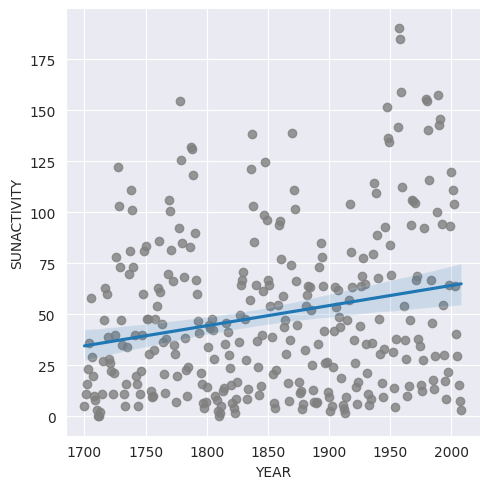

In [7]:
import seaborn as sns

sns.set_style(style="darkgrid")
sns.lmplot(x='YEAR', y='SUNACTIVITY', data=sunspots_data, scatter_kws={'color': 'gray'});

To achieve the same with R, we can use several approaches. One would be to use the magic notebook functions to directly plot the model:

In [8]:
# Ipython extension for plotting
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
ro.r('library(ggplot2)')

`geom_smooth()` using formula = 'y ~ x'


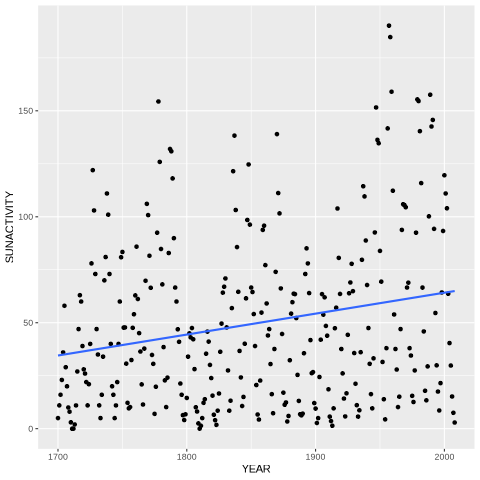

In [10]:
%%R
ggplot(sunspots_data, aes(x = YEAR, y = SUNACTIVITY)) + 
       geom_point() + geom_smooth(method = "lm", se = FALSE) + 
       labs(x = "YEAR", y = "SUNACTIVITY")